# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
cities

['ushuaia',
 'bluff',
 'codrington',
 'teguise',
 'mataura',
 'nueve de julio',
 'mentok',
 'bredasdorp',
 'abomsa',
 'hobart',
 'rikitea',
 'firminy',
 'ilulissat',
 'bongandanga',
 'barentsburg',
 'hermanus',
 'gladstone',
 'ulaangom',
 'hargeysa',
 'lovozero',
 'vaini',
 'narsaq',
 'kalabo',
 'mehamn',
 'atuona',
 'soria',
 'cabedelo',
 'russell',
 'nome',
 'luderitz',
 'lompoc',
 'otofuke',
 'jamestown',
 'kodiak',
 'cherskiy',
 'vardo',
 'cascavel',
 'trelew',
 'novaya chigla',
 'truckee',
 'hervey bay',
 'pevek',
 'sitka',
 'puerto ayora',
 'tasiilaq',
 'upernavik',
 'aksaray',
 'barao de melgaco',
 'east london',
 'laguna',
 'shelbyville',
 'sentyabrskiy',
 'viligili',
 'saint-leu',
 'kapaa',
 'paamiut',
 'wuwei',
 'albany',
 'henties bay',
 'chokurdakh',
 'mar del plata',
 'sayyan',
 'nikolskoye',
 'ewa beach',
 'manggar',
 'kaitangata',
 'hobyo',
 'tiksi',
 'lekoni',
 'chuy',
 'ponta do sol',
 'batagay-alyta',
 'belushya guba',
 'amderma',
 'saskylakh',
 'lesogorsk',
 'oistins

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
#query_url

#city_test = "ushuaia"
#response_test = requests.get(query_url + city_test).json()
#print(json.dumps(response_test, indent=4, sort_keys=True))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_number = 0

print("Beginning Data Retrieval")
print("----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    #print(json.dumps(response, indent=4, sort_keys=True))
    try:
        name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        index_number = index_number + 1

        print(f'Processing Record {index_number} of Set 1 | {city}')
            
    except KeyError:    
        print("City not found. Skipping... ")

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | teguise
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | nueve de julio
City not found. Skipping... 
Processing Record 7 of Set 1 | bredasdorp
City not found. Skipping... 
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | firminy
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | bongandanga
City not found. Skipping... 
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | gladstone
Processing Record 15 of Set 1 | ulaangom
Processing Record 16 of Set 1 | hargeysa
Processing Record 17 of Set 1 | lovozero
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | kalabo
Processing Record 21 of Set 1 | mehamn
Processing 

Processing Record 186 of Set 1 | severo-kurilsk
Processing Record 187 of Set 1 | correntina
Processing Record 188 of Set 1 | chalus
City not found. Skipping... 
City not found. Skipping... 
Processing Record 189 of Set 1 | haimen
Processing Record 190 of Set 1 | yellowknife
Processing Record 191 of Set 1 | kaduqli
Processing Record 192 of Set 1 | cabra
Processing Record 193 of Set 1 | fortuna
Processing Record 194 of Set 1 | sawakin
Processing Record 195 of Set 1 | hasaki
Processing Record 196 of Set 1 | mecca
Processing Record 197 of Set 1 | los llanos de aridane
Processing Record 198 of Set 1 | khatanga
Processing Record 199 of Set 1 | lovington
Processing Record 200 of Set 1 | roald
Processing Record 201 of Set 1 | san cristobal
Processing Record 202 of Set 1 | colac
Processing Record 203 of Set 1 | kandrian
Processing Record 204 of Set 1 | port hedland
Processing Record 205 of Set 1 | alofi
Processing Record 206 of Set 1 | vytegra
Processing Record 207 of Set 1 | pindwara
Processin

Processing Record 361 of Set 1 | kenai
Processing Record 362 of Set 1 | basco
City not found. Skipping... 
Processing Record 363 of Set 1 | leeton
Processing Record 364 of Set 1 | slave lake
Processing Record 365 of Set 1 | robertsport
Processing Record 366 of Set 1 | canela
Processing Record 367 of Set 1 | havre-saint-pierre
Processing Record 368 of Set 1 | palmer
Processing Record 369 of Set 1 | kodinsk
Processing Record 370 of Set 1 | pisco
Processing Record 371 of Set 1 | westport
Processing Record 372 of Set 1 | morada nova
Processing Record 373 of Set 1 | onega
Processing Record 374 of Set 1 | new iberia
Processing Record 375 of Set 1 | borogontsy
Processing Record 376 of Set 1 | salalah
Processing Record 377 of Set 1 | bethel
Processing Record 378 of Set 1 | sabang
Processing Record 379 of Set 1 | leshukonskoye
Processing Record 380 of Set 1 | klaksvik
Processing Record 381 of Set 1 | labuhan
Processing Record 382 of Set 1 | katsuura
Processing Record 383 of Set 1 | port-cartier

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(r'output_data/cities.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1558671818,86,-54.81,-68.31,39.20,5.82
1,Bluff,0,AU,1558671943,39,-23.58,149.07,78.17,10.60
2,Codrington,0,AU,1558671943,60,-28.95,153.24,73.40,2.24
3,Teguise,0,ES,1558671944,82,29.06,-13.56,66.20,18.34
4,Mataura,95,NZ,1558671944,61,-46.19,168.86,60.01,5.93


In [7]:
weather_data.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

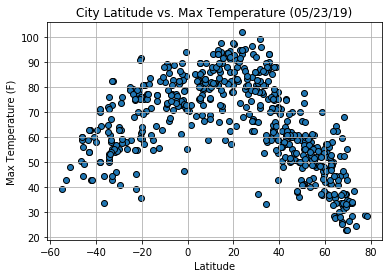

In [8]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"], edgecolors='k')
plt.grid()
plt.title("City Latitude vs. Max Temperature (05/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("images/City_Lat_v_Max_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

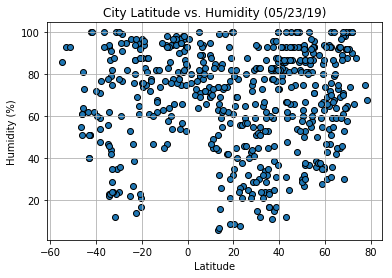

In [9]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"], edgecolors='k')
plt.grid()
plt.title("City Latitude vs. Humidity (05/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("images/City_Lat_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

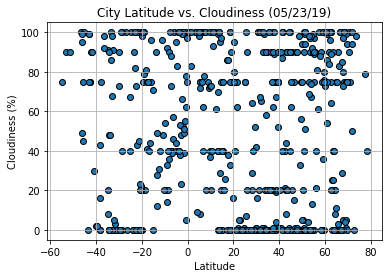

In [10]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], edgecolors='k')
plt.grid()
plt.title("City Latitude vs. Cloudiness (05/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("images/City_Lat_v_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

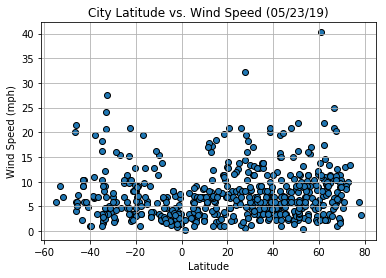

In [11]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], edgecolors='k')
plt.grid()
plt.title("City Latitude vs. Wind Speed (05/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("images/City_Lat_v_Wind_Speed.png")
plt.show()